In [497]:
# importing all the used libraries
import re
import pandas as pd
import numpy as np
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

## Gathering Data

In [498]:
# downloading the image-pridection.tsv file using requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
result = requests.get(url)
with open("image-predictions.tsv", "wb") as file:
    file.write(result.content)

In [499]:
# importing the data into pandas DataFrames

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predict = pd.read_csv('image-predictions.tsv' , sep = '\t')
tweet_jason = pd.read_json('tweet-json.txt' , lines = True)

## Assessing Data

In [500]:
# take a look at the first 10 rows of the image_predect table

image_predict.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [501]:
# take a look at the first 5 rows of the twitter_archive table

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [502]:
tweet_jason.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [503]:
tweet_jason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [504]:
# taking a look on the data types of the tabels

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [505]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [563]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [564]:
tweet_jason.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [565]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [506]:
# see if there are tweets with photos that doesn't contain dogs at all

image_predict[(image_predict['p1_dog'] == False) & (image_predict['p2_dog'] == False) & (image_predict['p3_dog'] == False)]['tweet_id'].value_counts()

tweet_id
666051853826850816    1
714631576617938945    1
742465774154047488    1
742161199639494656    1
740699697422163968    1
                     ..
674318007229923329    1
674265582246694913    1
674063288070742018    1
674045139690631169    1
892420643555336193    1
Name: count, Length: 324, dtype: int64

In [507]:
twitter_archive['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [508]:
# see what are the sources that people used to tweet

twitter_archive['source'].value_counts()

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: count, dtype: int64

In [509]:
 # check if there are rating_denomirators rather than 10

twitter_archive[twitter_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,NaN,NaN,NaN


In [510]:
# this code shows us if there are rows that doesn't have the same (id , id_str)

tweet_jason[tweet_jason['id_str'] == tweet_jason['id']]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
7,2017-07-28 00:22:40+00:00,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,56848,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,2015-11-16 01:01:59+00:00,666058600524156928,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666058597072306176, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,115,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2345,2015-11-16 00:55:59+00:00,666057090499244032,666057090499244032,My oh my. This is a rare blond Canadian terrie...,False,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666057085227016192, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,304,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2347,2015-11-16 00:35:11+00:00,666051853826850816,666051853826850816,This is an odd dog. Hard on the outside but lo...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666051848592334848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1253,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [511]:
#take a close look on the language column

tweet_jason['lang'].value_counts()

lang
en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: count, dtype: int64

## **Assesment Report**

## Quality Problems
### Validity Issues
#### Twitter_archive table
- incorrect data types in the columns (tweet_id , in_reply_to_status_id , in_reply_to_user_id , timestamp , retweeted_status_user_id , retweeted_status_user_id )

- weird charachters in the end of each value in the 'text' column
#### Image_predict table
- there are rows that doesn't contain an images for a dogs (like in row 6 and 17 in the table)

- incorrect data types in the columns (tweet_id)

- duplicates in jpg_url
#### Tweet_jason table
- incorrect datatypes on (id_str , in_reply_to_status_id_str , in_reply_to_user_id_str) columns its supposed to be a string

- display_text_range have to be intger and we can keep the upper bound only and supposed to be int dtybe
### **Completeness Issues**
#### Twitter_archive table
- many missing values in columns (doggo , floofer ,   pupper , puppo , expanded_urls)

### **Consistency Issues**
#### tweet_jason table
- user column is not necessarily we can dorp it
### **Accuracy Issues**
#### Tweet_jason table
- ('id' and 'id_str') doesn't have the same values

## **Tideness Problems**
#### Twitter_archive table
- the weird schema of the values in source column

- no need for these columns (in_reply_to_user_id , in_reply_to_status_id)

- the shape of (doggo , floofer , pupper , puppo) columns need to be organized into one column named dog_stage
#### Tweet_jason table
- no need to these columns (user , geo , coordinates , place , contributors , retweeted_status , favoreted , retweeted)

- small letters of lang column in the abbreviation

## Cleaning

In [512]:
# first I wil make a copy of the dataframe
twitter_archive_clean = twitter_archive.copy()
image_predict_clean = image_predict.copy()
tweet_jason_clean = tweet_jason.copy()

In [513]:
# first we have to rename the id tabel in in tweet_jason to tweet_id so i can remove it from all of them
tweet_jason_clean = tweet_jason_clean.rename(columns= {'id_str' : 'tweet_id'})

In [514]:
def seprator():
    print('\n')
    print('-'*65)
    print('\n')

 ##### Define
replace the ureadable text in source column in twitter archive with readable values

In [515]:
# Code
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' , 'twitter for iPhone' )
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' , 'Webpage' )
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' , 'Tweet Deck' )
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' , 'Vine' )

In [516]:
# Testing
twitter_archive_clean['source'].value_counts()

source
twitter for iPhone    2221
Vine                    91
Webpage                 33
Tweet Deck              11
Name: count, dtype: int64

##### Define
fix the incorrect data types of (tweet_id , in_reply_to_status_id ,in_reply_to_user_id , timestamp , retweeted_status_user_id , created at , retweeted_status_user_id)

In [517]:
# Code
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype(str)
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])
tweet_jason_clean['created_at'] = pd.to_datetime(tweet_jason_clean['created_at'])
tweet_jason_clean['tweet_id'] = tweet_jason_clean['tweet_id'].astype(str)
tweet_jason_clean['in_reply_to_user_id_str'] = tweet_jason_clean['in_reply_to_user_id_str'].astype(str)
tweet_jason_clean['in_reply_to_status_id_str'] = tweet_jason_clean['in_reply_to_status_id_str'].astype(str)
image_predict_clean['tweet_id'] = image_predict_clean['tweet_id'].astype(str)

In [518]:
# Testing

twitter_archive_clean.info()
seprator()
tweet_jason_clean.info()
seprator()
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

##### Define
replace missing values in retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp  , column with 'no retweet'


In [519]:
twitter_archive_clean['retweeted_status_id'].fillna(value = 'No retweet'  , inplace = True)
twitter_archive_clean['retweeted_status_user_id'].fillna(value = 'No retweet'  , inplace = True)
#twitter_archive_clean['retweeted_status_timestamp'].fillna(value = 'No retweet'  , inplace = True)

In [520]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

###### Define
correct the non 10 values in rating_denominator column or remove it since it have the same value across all the rows and rename the 'rating_numerator' column into 'rate'


In [521]:
# Code

twitter_archive_clean = twitter_archive_clean.drop('rating_denominator' , axis = 1)
twitter_archive_clean.rename(columns= {'rating_numerator' : 'rate'} , inplace= True)

In [522]:
# Test

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rate                        2356 non-null   int64           

##### Define

Remove all the rows from all table that doesn't contain dogs at all in image_predict table


In [523]:
# Code

twitter_archive_clean = pd.merge(twitter_archive_clean, image_predict_clean[['tweet_id' ,'p1_dog', 'p2_dog' , 'p3_dog']], on='tweet_id' , how = 'outer')

In [524]:

tweet_jason_clean = pd.merge(tweet_jason_clean, image_predict_clean[['tweet_id' ,'p1_dog', 'p2_dog' , 'p3_dog']], on='tweet_id' , how = 'outer')

In [525]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean['p1_dog'] == True) & (twitter_archive_clean['p2_dog'] == True) & (twitter_archive_clean['p3_dog'] == True)]

In [526]:
tweet_jason_clean = tweet_jason_clean[(tweet_jason_clean['p1_dog'] == True) & (tweet_jason_clean['p2_dog'] == True) & (tweet_jason_clean['p3_dog'] == True)]

In [527]:
image_predict_clean = image_predict_clean[(image_predict_clean['p1_dog'] == True) & (image_predict_clean['p2_dog'] == True) & (image_predict_clean['p3_dog'] == True)]

In [528]:
# Test

twitter_archive_clean[(twitter_archive_clean['p1_dog'] == False) & (twitter_archive_clean['p2_dog'] == False) & (twitter_archive_clean['p3_dog'] == False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rate,name,doggo,floofer,pupper,puppo,p1_dog,p2_dog,p3_dog


In [529]:
image_predict_clean[(image_predict_clean['p1_dog'] == False) & (image_predict_clean['p2_dog'] == False) & (image_predict_clean['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [530]:
tweet_jason_clean[(tweet_jason_clean['p1_dog'] == False) & (tweet_jason_clean['p2_dog'] == False) & (tweet_jason_clean['p3_dog'] == False)]


,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,p1_dog,p2_dog,p3_dog


##### Define
 remove the last part of the link from text column in twitter_archive table

In [531]:
# Code

def remove_urls(text, replacement_text= '.'):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_urls = url_pattern.sub(replacement_text, text)
    return no_urls

twitter_archive_clean['text'] = twitter_archive['text'].apply(remove_urls)

In [532]:
# Test

twitter_archive_clean.value_counts('text')

text
"AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOVE YOUUUUU" 11/10 .                                                                     1
This is Kyle. He's a heavy drinker and an avid pot user. Just wants to be pupular. 6/10 I can't support this Kyle .                  1
This is Leo. He was a skater pup. She said see ya later pup. He wasn't good enough for her. 12/10 you're good enough for me Leo .    1
This is Lenny. He was just told that he couldn't explore the fish tank. 12/10 smh all that work for nothing .                        1
This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop .        1
                                                                                                                                    ..
Say hello to Chipson. He's aerodynamic af. No eyes (devastating). 9/10 would make sure he didn't bump into stuff .                   1
Say hello to Carbon. This is his first time swimmi

##### Define
remove the lower range from display_text_range (0) and keep the upper bound to convert the column dtype to int

In [533]:
# Code

tweet_jason_clean['display_text_range'] = tweet_jason_clean['display_text_range'].str[1]

In [534]:
# before I can convert the dtype of display_text_range into int i have to fill the missing values in it

tweet_jason_clean['display_text_range'].fillna(value = tweet_jason['full_text'].str.len() , inplace = True)

In [535]:
tweet_jason_clean['display_text_range'].fillna(value = 0 , inplace = True)
tweet_jason_clean['full_text'].fillna(value = 0 , inplace = True)

In [536]:
tweet_jason_clean['display_text_range'] = tweet_jason_clean['display_text_range'].astype(int)

In [537]:
# Test
tweet_jason_clean['display_text_range']

2       121
4       138
7       118
8       122
10      130
       ... 
3072      0
3073      0
3074      0
3076      0
3078      0
Name: display_text_range, Length: 1243, dtype: int64

##### Define
remove the id and user column from tweet_jason_clean since they are not important

In [538]:
# Code

tweet_jason_clean.drop(columns = ['id' , 'user'] , inplace = True)

In [539]:
# Test

tweet_jason_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 2 to 3078
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     828 non-null    datetime64[ns, UTC]
 1   tweet_id                       1243 non-null   object             
 2   full_text                      1243 non-null   object             
 3   truncated                      828 non-null    object             
 4   display_text_range             1243 non-null   int64              
 5   entities                       828 non-null    object             
 6   extended_entities              828 non-null    object             
 7   source                         828 non-null    object             
 8   in_reply_to_status_id          7 non-null      float64            
 9   in_reply_to_status_id_str      828 non-null    object             
 10  in_reply_to_user_id          

##### Define
Capatlize the abbreviations in the lang column

In [540]:
# Code

tweet_jason_clean['lang'] = tweet_jason_clean['lang'].str.upper()

In [541]:
# Test

tweet_jason_clean['lang'].value_counts()

lang
EN    825
NL      2
ET      1
Name: count, dtype: int64

##### Define
make function to make the (doggo , floofer , pupper , puppo) one column with those names as values in column named dog_breed

In [542]:
# Code

def combine_dog_stages(row):
      stages = []
      if row['doggo'] == 'doggo':
        stages.append('doggo')
      if row['floofer'] == 'floofer':
        stages.append('floofer')
      if row['pupper'] == 'pupper':
        stages.append('pupper')
      if row['puppo'] == 'puppo':
        stages.append('puppo')
      return ', '.join(stages) if stages else None

twitter_archive_clean['dog_age_stage'] = twitter_archive_clean.apply(combine_dog_stages, axis=1)
# Droping the orginal columns
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [543]:
# Then we have to split the values

twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_age_stage'].apply(lambda x: x.split(', ') if isinstance(x, str) and ', ' in x else [x])
twitter_archive_clean = twitter_archive_clean.explode('dog_stage').reset_index(drop=True)

In [544]:
#Test

twitter_archive_clean.dog_stage.value_counts()

dog_stage
pupper     130
doggo       50
puppo       19
floofer      7
Name: count, dtype: int64

In [545]:
# see the describe fuction to decide which prediciton will be in the master dataset

image_predict_clean[['p1_conf' , 'p2_conf' , 'p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,1243.000000,1243.000000,1243.000000
mean,0.627221,0.143309,0.061627
std,0.252872,0.103886,0.053017
min,0.044333,0.000056,0.000008
25%,0.416577,0.055778,0.015731
50%,0.631501,0.130726,0.048666
75%,0.853345,0.207010,0.095207
max,0.999885,0.467678,0.273419


**from the table above we can tell that the first predicton is the best to be in the master dataset**

In [546]:
# rename the 'p1' column into 'dog_breed'

image_predict_clean.rename(columns = {'p1' : 'dog_breed'} , inplace = True)

In [547]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1243 non-null   object 
 1   jpg_url    1243 non-null   object 
 2   img_num    1243 non-null   int64  
 3   dog_breed  1243 non-null   object 
 4   p1_conf    1243 non-null   float64
 5   p1_dog     1243 non-null   bool   
 6   p2         1243 non-null   object 
 7   p2_conf    1243 non-null   float64
 8   p2_dog     1243 non-null   bool   
 9   p3         1243 non-null   object 
 10  p3_conf    1243 non-null   float64
 11  p3_dog     1243 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 100.8+ KB


In [548]:
# creating the master dataset to begin the analysis
first_two_tables = pd.merge(twitter_archive_clean[['tweet_id' , 'in_reply_to_status_id' , 'in_reply_to_user_id' ,'timestamp' , 'source'  , 'expanded_urls' , 'rate', 'name' , 'dog_stage', 'text']] ,
                            tweet_jason_clean[['tweet_id' , 'truncated' , 'display_text_range' , 'in_reply_to_user_id_str' , 'in_reply_to_status_id_str' ,'retweet_count' , 'favorite_count' , 'possibly_sensitive' , 'lang']] , on = 'tweet_id')

twitter_archive_master = pd.merge(first_two_tables ,
                                  image_predict_clean[['tweet_id','dog_breed' , 'jpg_url']] , on = 'tweet_id')

In [549]:
# Take a first look on our dataset

twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,expanded_urls,rate,name,dog_stage,text,truncated,display_text_range,in_reply_to_user_id_str,in_reply_to_status_id_str,retweet_count,favorite_count,possibly_sensitive,lang,dog_breed,jpg_url
0,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,This is Tilly. She's just checking pup on you....,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
1,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,False,121,nan,nan,4328.0,25461.0,0.0,EN,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
2,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,twitter for iPhone,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,This is Franklin. He would like you to stop ca...,False,138,nan,nan,9774.0,41048.0,0.0,EN,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
3,890729181411237888,nan,nan,2017-07-28 00:22:40+00:00,twitter for iPhone,https://twitter.com/dog_rates/status/890729181...,13,NaN,None,When you watch your owner call another dog a g...,False,118,nan,nan,16716.0,56848.0,0.0,EN,Pomeranian,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
4,890609185150312448,nan,nan,2017-07-27 16:25:51+00:00,twitter for iPhone,https://twitter.com/dog_rates/status/890609185...,13,Zoey,None,This is Zoey. She doesn't want to be one of th...,False,122,nan,nan,4429.0,28226.0,0.0,EN,Irish_terrier,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg


In [550]:
# fill the missing values with a placeholder such as 'no retweet'


twitter_archive_master = twitter_archive_master.fillna({'in_reply_to_user_id': 'no retweet', 'in_reply_to_status_id': 'no retweet'})

## **Analyzing and Visualizing Data**


#### **Insights**
1. Which dog breed get the most rating

2. What is the time that people share there dogs picture the most

3. Which of the type of captions that get higher rating

4. Which dog stage is favourited by the most of the people

<Axes: xlabel='rate', ylabel='dog_breed'>

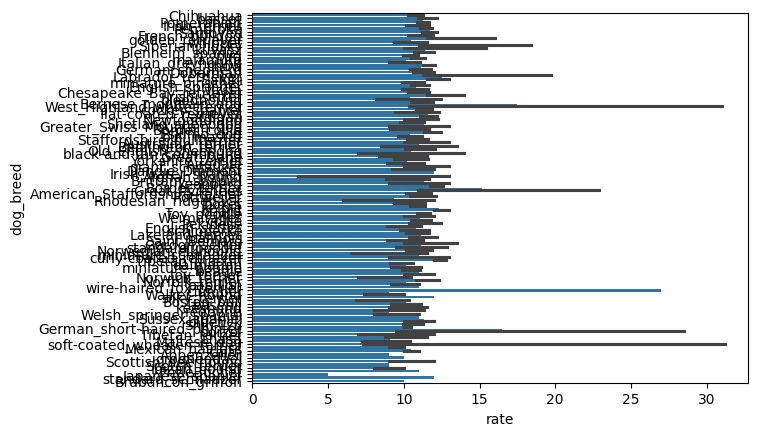

In [551]:
# This code will give me the average rating for each breed

avg_rating = twitter_archive_master.groupby('dog_breed')['rate'].mean().reset_index()
# This code make a barchert for dog_breed and rate columns (first insight)

sns.barplot(y = 'dog_breed' , x = 'rate' , data = twitter_archive_master , orient= 'h')

to make the chart above more clear I will make it take the most 10 breed in rating

Text(0.5, 1.0, 'Top 10 dog breeds in rating')

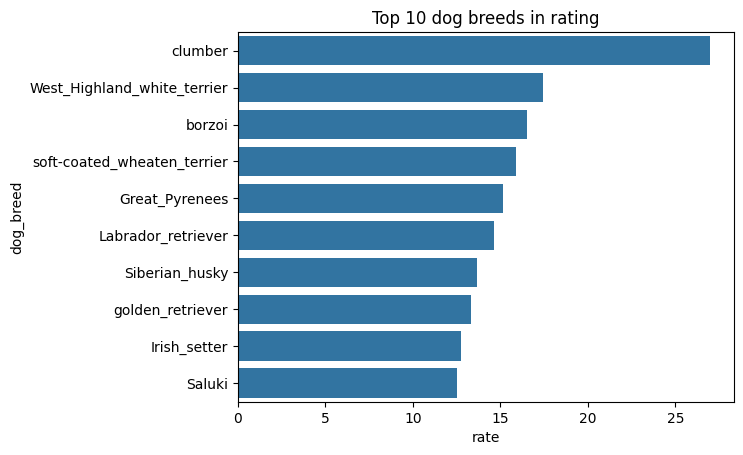

In [552]:
avg_rating = twitter_archive_master.groupby('dog_breed')['rate'].mean().reset_index()
bar = sns.barplot(y = 'dog_breed' , x = 'rate' , data = avg_rating.sort_values('rate' , ascending = False).head(10) , orient= 'h')
bar.set_title('Top 10 dog breeds in rating')

That tells us that the clumber dog is the most dog_breed with average rate more than 25

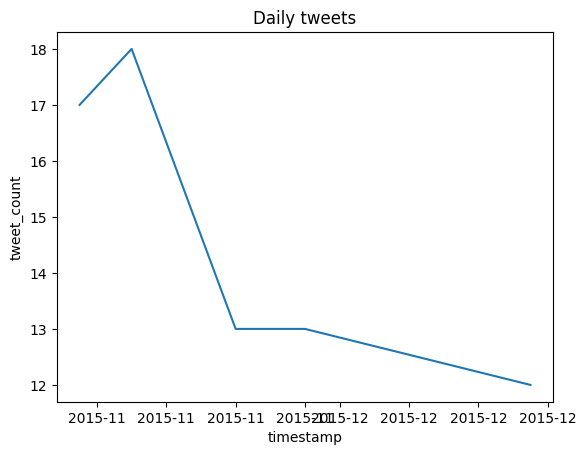

In [562]:
# this code show us when does people send more image for there dogs (Second insight)
# first I will creat a dataframe that contain all timestamp with the tweet count in this time
daily_tweets = twitter_archive_master.groupby(
    twitter_archive_master['timestamp'].dt.date).size().reset_index(name='tweet_count')
top_5_times = daily_tweets.sort_values('tweet_count' , ascending = False).head(5)
times = sns.lineplot(x = 'timestamp' , y = 'tweet_count' , data = top_5_times)
times.set_title('Daily tweets')
times.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

That tells us that people used to post there dog images the most in November 2015

In [554]:
# to work in the third insight , I have first to make a catagory of postive, negative and nautral captions

from textblob import TextBlob

In [555]:
# I will make a function that detrmines if that text is postive, negative or nautral using textblob library

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

twitter_archive_master['sentiment'] = twitter_archive_master['text'].apply(get_sentiment)

Text(0.5, 1.0, 'Average rating for each sentiment')

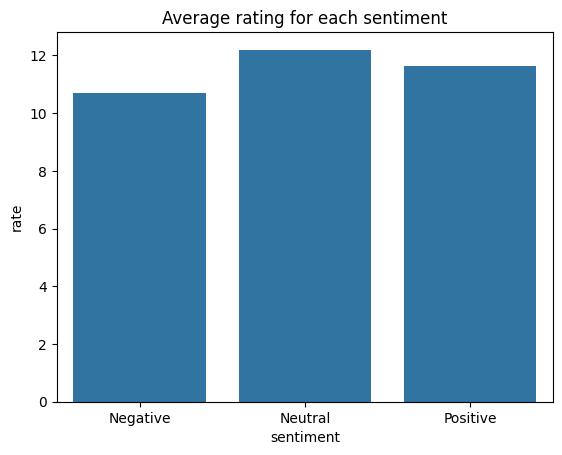

In [556]:
avg_rating_for_sentiment = twitter_archive_master.groupby('sentiment')['rate'].mean().reset_index()
retweet_chart = sns.barplot(x = 'sentiment' , y = 'rate' , data = avg_rating_for_sentiment)
retweet_chart.set_title('Average rating for each sentiment')

That tells us that on average nautral captions have the most ratings



Text(0.5, 1.0, 'favorite count for dog stage')

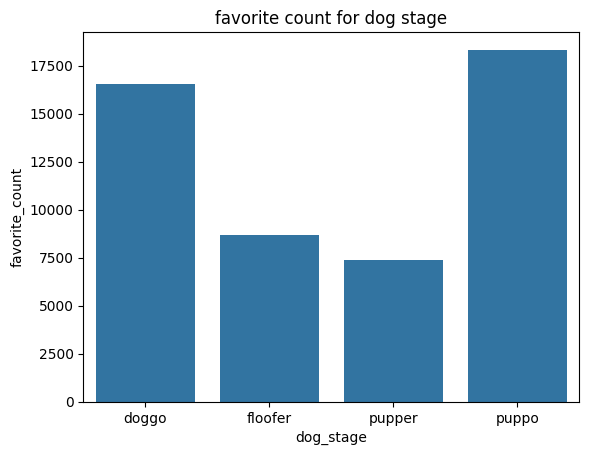

In [557]:
# to see which dog stage is favourited by people (the fourth insight)

fav_stage = twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().reset_index()
fav_stage_chart = sns.barplot(x = 'dog_stage' , y = 'favorite_count' , data = fav_stage)
fav_stage_chart.set_title('favorite count for dog stage')

Now we can tell that puppo stage is the most favourited stage by people

In [558]:
# lets save the twitter_archive master into csv

twitter_archive_master.to_csv('twitter_archive_master.csv')